# Classical Electrodynamics - Problem Set 2

## Dimitris Kourtesis - Subatomic Physics Masters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from rcparams import rcparams
mpl.rcParams.update(rcparams)

### Exercise 2.1:

(i) The energy density for a capacitor made of two parallel conducting sheets is given by:

$$w(z)=\frac{Q^{2}}{2\epsilon_{0}A^{2}},\quad 0<z<d$$

(ii) The energy density for a capacitor made of two concentric conducting spheres is given by:

$$w(r)=\frac{Q^{2}}{32\pi^{2}\epsilon_{0}}\frac{1}{r^{4}},\quad \alpha<r<b$$

(iii) The energy density for a capacitor made of two coaxial conducting cylinders is given by:

$$w(\varrho)=\frac{Q^{2}}{8\pi^{2}\epsilon_{0}L^{2}}\frac{1}{\varrho^{2}}$$

Below, a comparative qualitative plot of the energy density for the different geometries is provided. We assume the constants $d=b=10m$, $a=b/2=5m$, $L=2\alpha=10m$, $A=4\pi\alpha^{2}$ and $Q=1\cdot 10^{-9}C$.

In [2]:
# Definition of constants related to the problem.
Q = 1e-9
d = 10 ; b = 10 ; a = b/2 ; L = 2*a ; A = 4 * np.pi * (a**2)
# Definition of physical constants in SI
e0 = 8.854 * 10**(-12)

In [3]:
def w_sheet(z, Q, A, d):
    w = np.zeros_like(z)
    mask = (z <= d)
    w[mask] = (Q**2) / (2 * e0 * (A**2))
    return w

def w_sphere(r, Q, a, b):
    w = np.zeros_like(r)
    mask = (r >= a) & (r <= b)
    w[mask] = (Q**2) / (32 * (np.pi**2) * e0 * (r[mask]**4))
    return w

def w_cyl(rho, Q, L, a, b):
    w = np.zeros_like(rho)
    mask = (rho >= a) & (rho <= b)
    w[mask] = (Q**2) / (8 * (np.pi**2) * e0 * (L**2) * (rho[mask]**2))
    return w

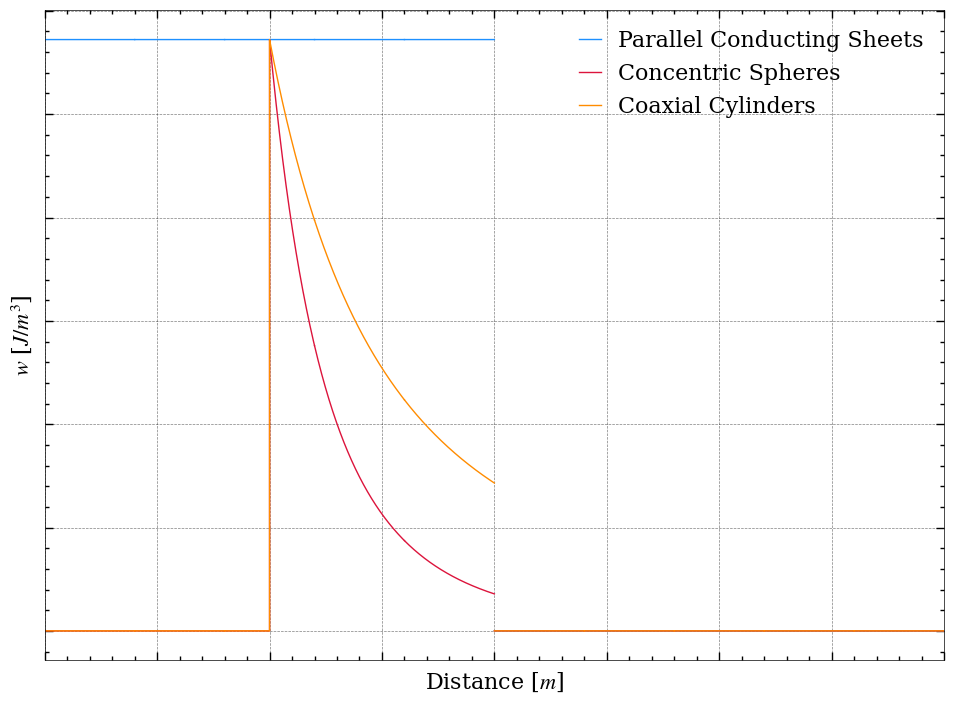

In [4]:
N = int(1e5) # constant for creating arrays
colors = ["#1E90FF", "#DC143C", "#FF8C00"]  # seaborn muted triplet
plt.figure(figsize=(10,7.5), tight_layout=True)

# w_sheet
z = np.linspace(0, 2*d, N)
w_sheet_vals = w_sheet(z, Q, A, d)
plt.plot(z, w_sheet_vals, color=colors[0], label=r"Parallel Conducting Sheets")

# w_sphere
r = np.linspace(0, 2*b, N)
w_sphere_vals = w_sphere(r, Q, a, b)
plt.plot(r, w_sphere_vals, color=colors[1], label=r"Concentric Spheres")

# w_cyl
rho = np.linspace(0, 2*b, N)
w_cyl_vals = w_cyl(rho, Q, L, a, b)
plt.plot(rho, w_cyl_vals, color=colors[2], label=r"Coaxial Cylinders")

plt.xlabel(r"Distance [$m$]") ; plt.xlim(0, 2*b) 
plt.ylabel(r"$w$ [$J/m^{3}$]")
plt.tick_params(labelbottom=False, labelleft=False)
plt.legend(frameon=False, loc="upper right", handlelength=1)
plt.savefig("capacitors.png", dpi=200)
plt.show()